In [43]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [44]:
#Зчитуємо файл і виводимо перші 5 рядків таблиці
df = pd.read_csv('shopping_trends.csv', delimiter=',', encoding='latin1')  
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [45]:
#Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип стовпців.

rows, columns = df.shape
total_elements = df.size
print(rows,columns)
print(total_elements)

3900 19
74100


In [46]:
#Далі рекомендовано використовувати наступні стовпці (з огляду на тип даних) "Age", "Purchase Amount (USD)", 
#"Review Rating", "Previous Purchases".

selected_columns = df[["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]]
selected_columns.columns = ["age", "purchase_amount", "review_rating", "previous_purchases"]
selected_columns.head(5)

,age,purchase_amount,review_rating,previous_purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [47]:
#1.1. Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці.
#Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).

scaler = StandardScaler()

# Застосуйте масштабування до вибраних стовпців
scaled_data = scaler.fit_transform(selected_columns)
print(scaled_data)

[[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.13013923 -1.18686209 -0.09356268]
 [-0.00450238  0.72778407  0.06989124 -0.09356268]
 [ 0.52161822  0.89668619 -0.90758357  0.52947851]]


In [48]:
#1.2. Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

kmeans = KMeans(n_clusters=3)

# Навчіть модель на масштабованих даних
kmeans.fit(scaled_data)

# Отримайте мітки кластерів для кожного запису
labels = kmeans.labels_
print(labels)

D:\Programmes\54. ForAnaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 0 1 ... 2 1 1]


D:\Programmes\54. ForAnaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programmes\54. ForAnaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programmes\54. ForAnaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Programmes\54. ForAnaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

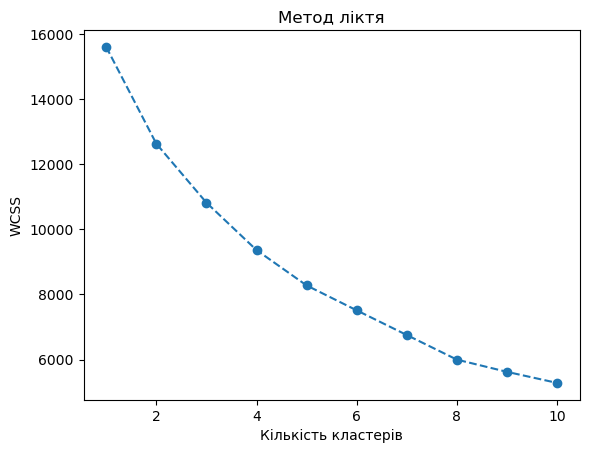

In [49]:
#2. 1. Використайте метод ліктя (Elbow Method), щоб визначити оптимальну кількість кластерів.
#Цей метод вимагає повторної кластеризації даних для різної кількості кластерів і обчислення вартості кластерів.
#Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів.

#2.	Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", де
#спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів.

# Створення порожнього списку для збереження вартості кластерів
wcss = []

# Визначення максимальної кількості кластерів, яку ви хочете спробувати
max_clusters = 10

# Виконання K-means для різної кількості кластерів
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Побудова графіка WCSS
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')  # WCSS - Within-Cluster Sum of Squares
plt.show()

In [50]:
#3. Кластеризація за допомогою K-means:
#Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.
#Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера.


optimal_clusters = 3  # Замініть на знайдену оптимальну кількість

# Створення моделі K-means
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)

# Проведення кластеризації
kmeans.fit(scaled_data)

# Отримання ідентифікаторів кластерів для кожного об'єкту
cluster_labels = kmeans.labels_
print(cluster_labels)

D:\Programmes\54. ForAnaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 0 1 ... 2 1 1]


In [51]:
df['Cluster'] = cluster_labels

In [52]:
# Створіть об'єкт PCA з бажаною кількістю компонент
pca = PCA(n_components=2)  # Зменшимо розмірність до 2 компонент

# Проведемо зменшення розмірності на масштабованих даних
reduced_data = pca.fit_transform(scaled_data)

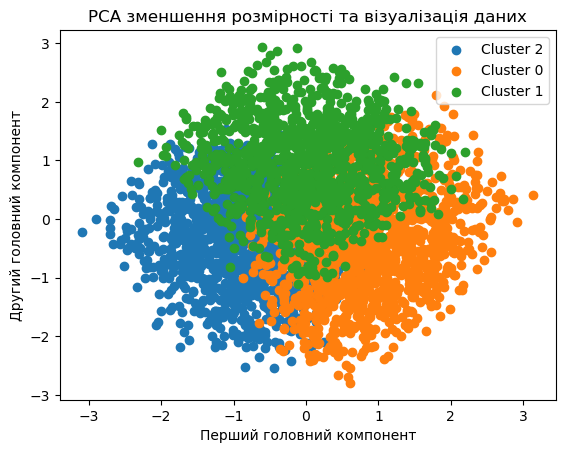

In [53]:
#Якщо ви хочете візуалізувати дані, які мають більше двох ознак, ви можете використовувати метод головних компонентів (PCA)
#для зменшення розмірності даних і подальшої візуалізації. PCA допоможе вам зменшити кількість ознак до 2 або 3, щоб 
#побудувати графіки.

# Розділіть дані на окремі кластери
clusters = df['Cluster'].unique()

# Побудуйте графік для кожного кластера
for cluster in clusters:
    plt.scatter(reduced_data[df['Cluster'] == cluster][:, 0], reduced_data[df['Cluster'] == cluster][:, 1], label=f'Cluster {cluster}')

plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.title('PCA зменшення розмірності та візуалізація даних')
plt.legend()
plt.show()

In [ ]:
#Висновки:Отже, зробивши лабораторну роботу, ми зрозуміли, що кластеризація даних є потужним інструментом для
#виявлення прихованих структур в наборах даних. Визначення оптимальної кількості кластерів є важливою частиною
#процесу кластеризації, оскільки вона впливає на результати інтерпретації даних. 